In [242]:
# importing libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import mean_squared_error as mse
from sklearn.linear_model import LogisticRegression

In [11]:
# import AQS data with only columns you need
file = "C:/Users/rache/Documents/University of Southern California/2023-2024 Year 4/GEOL 599 Environmental data science/data/HW3_LA_AQS_2023.csv" #note on path
aqs = pd.read_csv(file)
aqs= aqs.loc[:,['Parameter Name','Duration Description','Date (Local)','Arithmetic Mean']]
# aqs.head()
# print(aqs["Parameter Name"].unique())

In [26]:
# Select for parameters ''Ozone', Nitrogen dioxide (NO2)', and 'PM2.5 - Local Conditions'
O3 = aqs[(aqs['Parameter Name']=='Ozone') & (aqs['Duration Description']=='1 HOUR')]
O3.loc[:,'Arithmetic Mean'] = O3.loc[:,'Arithmetic Mean']*1000 #Convert to ppb
O3 = O3.rename(columns={'Parameter Name':'Parameter','Date (Local)': 'Date','Arithmetic Mean': 'Value','Duration Description': 'Duration'}) # rename column name to be shorter
# O3.head()
# O3.describe()
NO2 = aqs[(aqs['Parameter Name']=='Nitrogen dioxide (NO2)') & (aqs['Duration Description']=='1 HOUR')]
NO2 = NO2.rename(columns={'Parameter Name':'Parameter','Date (Local)': 'Date', 'Arithmetic Mean': 'Value', 'Duration Description': 'Duration'})
# NO2.head()
# NO2.describe()
PM = aqs[(aqs['Parameter Name']=='PM2.5 - Local Conditions') & (aqs['Duration Description']=='1 HOUR')]
PM = PM.rename(columns={'Parameter Name':'Parameter','Date (Local)': 'Date', 'Arithmetic Mean': 'Value', 'Duration Description': 'Duration'})
# PM.head()
# PM.describe()

In [55]:
# Merge the 3 datasets together
df = O3.merge(NO2, on= ['Date','Duration'], suffixes= ('_O3','_NO2'))
df = df.merge(PM, on= ['Date','Duration']) # no suffix is the column for PM
df

,Parameter_O3,Duration,Date,Value_O3,Parameter_NO2,Value_NO2,Parameter,Value
0,Ozone,1 HOUR,2023-01-01,31.708,Nitrogen dioxide (NO2),4.816667,PM2.5 - Local Conditions,5.087500
1,Ozone,1 HOUR,2023-01-01,31.708,Nitrogen dioxide (NO2),4.550000,PM2.5 - Local Conditions,5.087500
2,Ozone,1 HOUR,2023-01-01,31.708,Nitrogen dioxide (NO2),4.550000,PM2.5 - Local Conditions,5.087500
3,Ozone,1 HOUR,2023-01-01,31.708,Nitrogen dioxide (NO2),4.816667,PM2.5 - Local Conditions,5.087500
4,Ozone,1 HOUR,2023-01-02,15.792,Nitrogen dioxide (NO2),14.720833,PM2.5 - Local Conditions,9.187500
...,...,...,...,...,...,...,...,...
1079,Ozone,1 HOUR,2023-09-29,39.048,Nitrogen dioxide (NO2),8.614286,PM2.5 - Local Conditions,10.875000
1080,Ozone,1 HOUR,2023-09-30,30.042,Nitrogen dioxide (NO2),6.370833,PM2.5 - Local Conditions,6.416667
1081,Ozone,1 HOUR,2023-09-30,30.042,Nitrogen dioxide (NO2),6.370833,PM2.5 - Local Conditions,6.416667
1082,Ozone,1 HOUR,2023-09-30,30.042,Nitrogen dioxide (NO2),7.362500,PM2.5 - Local Conditions,6.416667


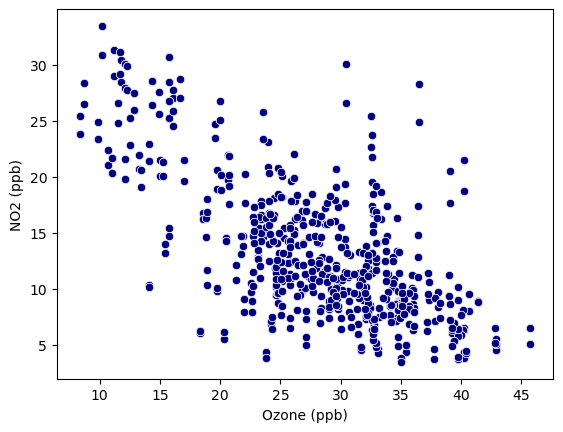

In [31]:
# Scatterplot of O3 vs. NO2
plot= sns.scatterplot(data=df, x="Value_O3", y="Value_NO2", color='navy')
plot.set_xlabel("Ozone (ppb)")
plot.set_ylabel("NO2 (ppb)")
plt.show()

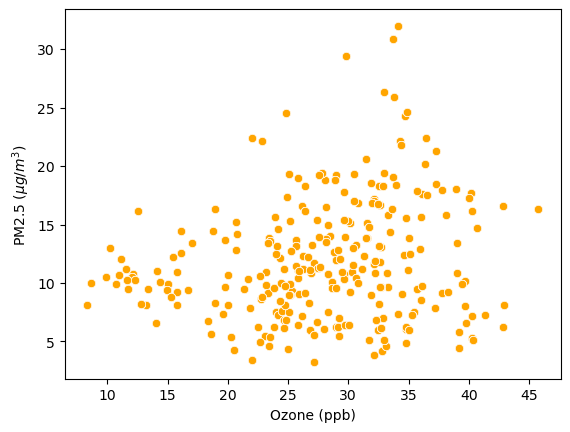

In [36]:
# Scatterplot of O3 vs. PM2.5
plot= sns.scatterplot(data=df, x="Value_O3", y="Value", color='orange')
plot.set_xlabel("Ozone (ppb)")
plot.set_ylabel("PM2.5 ($µg/m^3$)")
plt.show()

In [62]:
# Add column for winter vs. summer months (summer = 1, winter = 0)
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month
df['Season'] = 0 #Create season columns with 0 for winter
df.loc[(df['Month']>2)&(df['Month']<6),'Season'] = -1 #Set spring
df.loc[(df['Month']>5)&(df['Month']<9),'Season'] = 1 #Set summer
df.loc[(df['Month']>8)&(df['Month']<12),'Season'] = -1 #Set autumn

[0 1]


In [63]:
# Drop all data for spring and autumn.
df2 = df[df['Season']!=-1] 
df2

,Parameter_O3,Duration,Date,Value_O3,Parameter_NO2,Value_NO2,Parameter,Value,Month,Season
0,Ozone,1 HOUR,2023-01-01,31.708,Nitrogen dioxide (NO2),4.816667,PM2.5 - Local Conditions,5.087500,1,0
1,Ozone,1 HOUR,2023-01-01,31.708,Nitrogen dioxide (NO2),4.550000,PM2.5 - Local Conditions,5.087500,1,0
2,Ozone,1 HOUR,2023-01-01,31.708,Nitrogen dioxide (NO2),4.550000,PM2.5 - Local Conditions,5.087500,1,0
3,Ozone,1 HOUR,2023-01-01,31.708,Nitrogen dioxide (NO2),4.816667,PM2.5 - Local Conditions,5.087500,1,0
4,Ozone,1 HOUR,2023-01-02,15.792,Nitrogen dioxide (NO2),14.720833,PM2.5 - Local Conditions,9.187500,1,0
...,...,...,...,...,...,...,...,...,...,...
959,Ozone,1 HOUR,2023-08-30,30.458,Nitrogen dioxide (NO2),30.041667,PM2.5 - Local Conditions,19.279167,8,1
960,Ozone,1 HOUR,2023-08-31,25.042,Nitrogen dioxide (NO2),18.208333,PM2.5 - Local Conditions,19.341667,8,1
961,Ozone,1 HOUR,2023-08-31,25.042,Nitrogen dioxide (NO2),18.208333,PM2.5 - Local Conditions,19.341667,8,1
962,Ozone,1 HOUR,2023-08-31,25.042,Nitrogen dioxide (NO2),20.458333,PM2.5 - Local Conditions,19.341667,8,1


In [64]:
#Rename 'Value' column
df2 = df2.rename(columns={'Value_O3':'O3','Value_NO2': 'NO2', 'Value': 'PM2.5'})
df2

,Parameter_O3,Duration,Date,O3,Parameter_NO2,NO2,Parameter,PM2.5,Month,Season
0,Ozone,1 HOUR,2023-01-01,31.708,Nitrogen dioxide (NO2),4.816667,PM2.5 - Local Conditions,5.087500,1,0
1,Ozone,1 HOUR,2023-01-01,31.708,Nitrogen dioxide (NO2),4.550000,PM2.5 - Local Conditions,5.087500,1,0
2,Ozone,1 HOUR,2023-01-01,31.708,Nitrogen dioxide (NO2),4.550000,PM2.5 - Local Conditions,5.087500,1,0
3,Ozone,1 HOUR,2023-01-01,31.708,Nitrogen dioxide (NO2),4.816667,PM2.5 - Local Conditions,5.087500,1,0
4,Ozone,1 HOUR,2023-01-02,15.792,Nitrogen dioxide (NO2),14.720833,PM2.5 - Local Conditions,9.187500,1,0
...,...,...,...,...,...,...,...,...,...,...
959,Ozone,1 HOUR,2023-08-30,30.458,Nitrogen dioxide (NO2),30.041667,PM2.5 - Local Conditions,19.279167,8,1
960,Ozone,1 HOUR,2023-08-31,25.042,Nitrogen dioxide (NO2),18.208333,PM2.5 - Local Conditions,19.341667,8,1
961,Ozone,1 HOUR,2023-08-31,25.042,Nitrogen dioxide (NO2),18.208333,PM2.5 - Local Conditions,19.341667,8,1
962,Ozone,1 HOUR,2023-08-31,25.042,Nitrogen dioxide (NO2),20.458333,PM2.5 - Local Conditions,19.341667,8,1


In [66]:
# Combine O3, NO2, and PM2.5 values into numpy array for X.
X = df2.loc[:,['O3','NO2','PM2.5']].to_numpy()
X

array([[31.708   ,  4.816667,  5.0875  ],
       [31.708   ,  4.55    ,  5.0875  ],
       [31.708   ,  4.55    ,  5.0875  ],
       ...,
       [25.042   , 18.208333, 19.341667],
       [25.042   , 20.458333, 19.341667],
       [25.042   , 20.458333, 19.341667]])

In [67]:
# Convert Season values 
y = df2.loc[:,'Season'].to_numpy()
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [237]:
# Split df2 dataset into training, validation, and test data.
X_tr, X1 , y_tr, y1 = tts(X, y, test_size= 0.25) #split into 75% training, 25% everything else
X_va, X_te, y_va, y_te = tts(X1, y1, test_size= 0.6) #split the 25% into 40% validation (10% of original), 60% test (15% of original)

In [238]:
classify= RidgeClassifier(alpha=0.9)
classify.fit(X_tr,y_tr) #Use ridge classify on training dataset
print(classify.score(X_tr,y_tr)) #Changing alpha doesn't change score
print(classify.score(X_va,y_va))
print(classify.score(X_te,y_te))

0.8609271523178808
0.8333333333333334
0.8351648351648352


In [241]:
# Calculate the error b/t the test set's predicted y and actual y
pred = classify.predict(X_te)
error = mse(y_te, pred)
print(error) 

0.16483516483516483


In [214]:
# Try again with 80:10:10 split in training:validation:test
X_tr2, X2 , y_tr2, y2 = tts(X, y, test_size= 0.20)
X_va2, X_te2, y_va2, y_te2 = tts(X2, y2, test_size= 0.5) 

In [227]:
classify2= RidgeClassifier(alpha=0.9)
classify2.fit(X_tr2,y_tr2)
print(classify2.score(X_tr2,y_tr2))
print(classify2.score(X_va2,y_va2))
print(classify2.score(X_te2,y_te2))

0.8509316770186336
0.7833333333333333
0.8852459016393442


In [228]:
# Try again with 60:30:10 split in training:validation:test
X_tr3, X3 , y_tr3, y3 = tts(X, y, test_size= 0.40)
X_va3, X_te3, y_va3, y_te3 = tts(X2, y2, test_size= 0.25) 

In [231]:
classify2= RidgeClassifier(alpha=0.9)
classify2.fit(X_tr3,y_tr3)
print(classify2.score(X_tr3,y_tr3))
print(classify2.score(X_va3,y_va3))
print(classify2.score(X_te3,y_te3))

0.861878453038674
0.8222222222222222
0.8387096774193549


In [244]:
# Generate a logistic regression model
log_model= LogisticRegression()
log_model.fit(X_tr,y_tr)
print(log_model.score(X_tr,y_tr))
print(log_model.score(X_va,y_va))
print(log_model.score(X_te,y_te))

0.8741721854304636
0.85
0.9120879120879121


In [ ]:
### Answers to homework
# 2) The cost function I'm using is a penalized regression model.
# 3) and 4) Both my training and validation datasets do not have an optimal ridge penalty. The score value stays the same regardless of what alpha values are chosen.
# 5) The mean squared error between the ridge model-predicted and actual values in the test dataset is 0.164.
# 6) Redoing the train/validation splits, even when using the same split ratio, will yield different answers.
# 7) Comparing the scores of the ridge regression and the logistic regression, the higher scores in the logistic regression model for the training, validation, and test datasets suggest the logistic model performs better than the ridge regression.